/tmp/ipykernel_1332279/1580771630.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_array, hist=False)


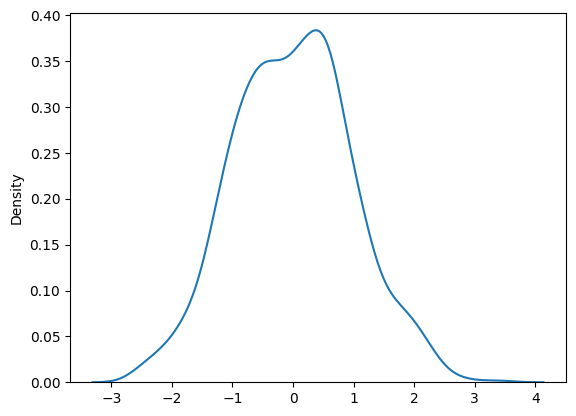

In [2]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_array = random.normal(size=1000, )
sns.distplot(random_array, hist=False)

plt.show() 

In [3]:
series = pd.Series(random_array)

Перед вами нормально-распределенный массив сконвертированный в Pandas Series. Необходимо расчитать следующие статистики для массива (series), используя только собственно-написанные формулы:
* среднее значение 
* медиану 
* стандартное отклонение
* межквартильный размах
* 23-й перцентиль


# Решение

In [4]:
# среднее значение

def mean_(series: pd.Series) -> series.dtype:
    return sum(series.values)/series.size

print(mean_(series))

#print(series.mean() == mean_(series))

0.00015299501767599376


In [5]:
# медиана

def median_(series: pd.Series) -> series.dtype:
    s = sorted(series.values)  # помещаем сортированный массив в отдельный список
    # series.values.sort() использовать нельзя т.к. эта функция делает сортировку inplace

    mid = series.size // 2
    if series.size % 2 == 0:  # четное количество чисел
        return (s[mid - 1] + s[mid]) / 2
    else:
        return s[mid]

print(median_(series))

#print(median_(series) == series.median())

0.02935667240385754


In [6]:
# стандартное отклонение

def std_(series: pd.Series) -> float:
    mu = mean_(series)
    return pow((sum((series - mu)**2) / series.size),1/2)

print(std_(series))

#from numpy import std
#std_(series) == std(series)

0.973953612994003


In [7]:
# межквартильный размах

def percentile_(series: pd.Series, p: int) -> float:
    s = sorted(series.values)
    ind = int(round(p * series.size / 100))
    return s[ind-1]

IRQ = percentile_(series, 75) - percentile_(series, 25)
print(IRQ)

#from numpy import percentile
#print((percentile(series, 75) - percentile(series, 25)) - IRQ)
#почему появляется разница со стандартной функцией в третьем знаке не понятно


1.3333709335049275


In [8]:
# 23-й перцентиль
percentile_(series, 23)

-0.7676156466687888